**Flow Chart: -**

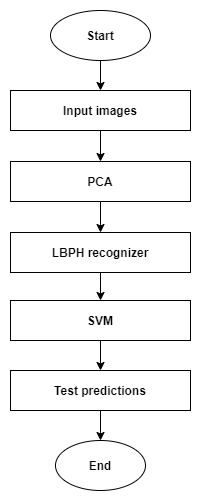

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA

**Dataset Description : -** <br> <br>
 **lfw dataset** consists of a database of face photographs designed for studying the problem of unconstrained face recognition. The data set contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set.
The images are in grayscale (pixel values = 0 — 255).


In [2]:
#load data
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [4]:
#As can be seen from the variable explorer, we have 1288 samples (pictures) with a height of 50 px and a 
#width of 37 px (50 x 37 = 1850 features)
print(n_samples) 
print(h)
print(w)

1288
50
37


In [5]:
#data in X has 1288 samples and 1850 features for each sample
X = lfw_people.data
n_features = X.shape[1]
print(n_features)

1850


In [6]:
#Target & Target Names — Labels
# y represents the target which is the label of each picture,  label is further defined by the target_names variable. 
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [7]:
print(target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [8]:
print("Total dataset size:")
print("n_samples: %d", n_samples)
print("n_features: %d", n_features)
print("n_classes: %d", n_classes)

Total dataset size:
n_samples: %d 1288
n_features: %d 1850
n_classes: %d 7


In [9]:
#Splitting into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
#dimensionaltiy reduction (PCA)
#it is used to reduce the dimensions of the data
n_components = 50
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

In [23]:
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenfaces

array([[[-6.83416659e-03, -7.51217920e-03, -9.18079540e-03, ...,
         -9.69869364e-03, -8.99150781e-03, -9.30516142e-03],
        [-7.28524011e-03, -8.41978099e-03, -1.08400537e-02, ...,
         -1.01802712e-02, -9.21193883e-03, -9.77230258e-03],
        [-8.28153826e-03, -1.00230640e-02, -1.28166750e-02, ...,
         -1.12721417e-02, -9.74056683e-03, -1.00243287e-02],
        ...,
        [-3.61069944e-03, -3.69120878e-03, -6.10601995e-03, ...,
         -1.59261338e-02, -1.44148627e-02, -1.34325065e-02],
        [-5.28681837e-03, -5.19286422e-03, -6.25765650e-03, ...,
         -1.54660465e-02, -1.34935426e-02, -1.24651948e-02],
        [-6.24803826e-03, -6.26498275e-03, -6.75039319e-03, ...,
         -1.42106591e-02, -1.28537957e-02, -1.17793977e-02]],

       [[ 2.30088048e-02,  2.15328671e-02,  2.27489863e-02, ...,
         -2.10965145e-02, -2.16651838e-02, -2.13339813e-02],
        [ 2.26848628e-02,  2.19452828e-02,  2.44839527e-02, ...,
         -2.17577219e-02, -2.23264191e

In [26]:
#we use PCA’s transform on both X_train and X_test to reduce the dimensionality
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca

array([[-1.9840643 , -1.0443068 ,  2.1029453 , ..., -0.9830062 ,
         5.7307744 ,  0.8531098 ],
       [ 1.3231525 ,  0.5956274 ,  0.53261966, ...,  0.07752819,
         0.0720759 , -0.07748738],
       [-0.75832605, -0.02077421, -0.2390565 , ..., -0.563567  ,
        -0.41288623, -0.40163332],
       ...,
       [-0.7562673 ,  0.03705084, -0.21140952, ..., -0.40676123,
         0.6466971 ,  0.68946475],
       [-0.26571974,  0.8375243 , -0.22427228, ..., -0.30129054,
        -0.49806976,  0.43297485],
       [-1.3147068 , -1.1297113 ,  0.15646076, ..., -0.2700778 ,
         0.21402447,  0.12755416]], dtype=float32)

 We have a total of 966 features in the training set X_train , and we will reduce them to 50

### LBPH Recognizer

In [13]:
model = cv2.face.LBPHFaceRecognizer_create()

In [14]:
#load harcascade file
def face_detection(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haar_classifier = cv2.CascadeClassifier(r'C:\Users\ROHIT\Desktop\Facial-Recognition-with-Opencv-LBPH-master\haarcascades\haarcascade_frontalface_default.xml')
    face = haar_classifier.detectMultiScale(image_gray, scaleFactor=1.3, minNeighbors=7)
    (x,y,w,h) = face[0]
    return image_gray[y:y+w, x:x+h], face[0]

In [15]:
def predict_image(test_image):
    #img = test_image.copy()
    face, bounding_box = face_detection(test_image)
    label = model.predict(face)
    #label_text = database[label-1]
    print (label)
    #print (label_text)
    (x,y,w,h) = bounding_box
    cv2.rectangle(test_image, (x,y), (x+w, y+h), (0,255,0), 3)
    cv2.resize(test_image, (int(test_image.shape[1]/7), int(test_image.shape[0]/7)))
    #cv2.putText(test_image, (x,y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)
    return test_image

# SVM model

In [16]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid) #hyperparameter tunning technique along with SVM
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)


In [17]:
y_pred = clf.predict(X_test_pca)

In [18]:
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.77      0.69        13
     Colin Powell       0.83      0.92      0.87        60
  Donald Rumsfeld       0.70      0.59      0.64        27
    George W Bush       0.87      0.90      0.89       146
Gerhard Schroeder       0.75      0.72      0.73        25
      Hugo Chavez       0.77      0.67      0.71        15
       Tony Blair       0.86      0.69      0.77        36

         accuracy                           0.83       322
        macro avg       0.77      0.75      0.76       322
     weighted avg       0.83      0.83      0.82       322



In [19]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

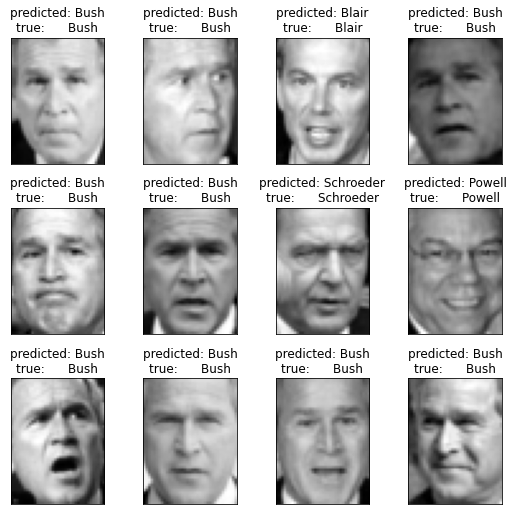

In [20]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

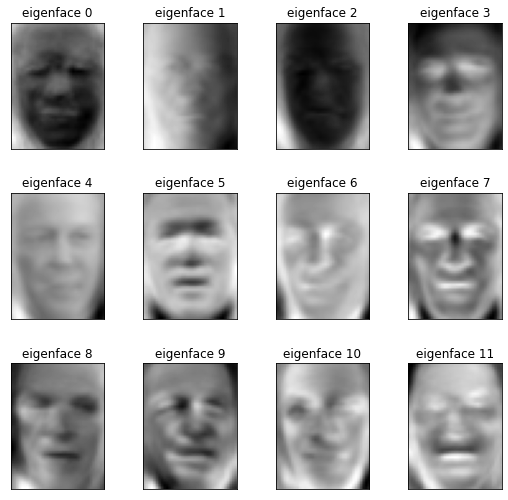

In [21]:
#now plot the eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

In [22]:
# let us plot the accuracy of the PCA, LBPH + SVM Model for Facial Recognition
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8260869565217391


**References : -**
1. https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html 
2. https://docs.opencv.org/2.4/modules/contrib/doc/facerec/facerec_tutorial.html#local-binary-patterns-histograms